Ordering mode:  zig_zag


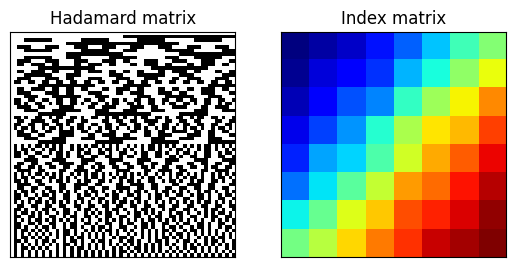

In [126]:
import matplotlib.pyplot as plt
import numpy as np

from libs.ordering import get_index_matrix
from libs.ordering.sequency import sequency_order
from libs.row_wise import hadamard_row

n = 6
ordering = "cake_cutting"

size = np.sqrt(2**n).astype(int)
index_matrix = size*size - get_index_matrix(size, ordering)


ordering_list = sequency_order(2**n)

order_temp = index_matrix.copy()
order_temp[:, 1::2] = order_temp[::-1, 1::2]
order_temp = index_matrix.reshape(-1, order="F")
order_temp = np.argsort(order_temp)
ordering_list = [ordering_list[i] for i in order_temp]

H = []


for i in range(2**n):
    index = ordering_list[i]
    H.append(hadamard_row(index, n))


H = np.array(H).squeeze()

fig, axs = plt.subplots(1, 2)

print("Ordering mode: ", ordering)

plt.subplot(1, 2, 1)
plt.imshow(H, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.title("Hadamard matrix")

plt.subplot(1, 2, 2)
plt.imshow(index_matrix, cmap='jet')
plt.xticks([])
plt.yticks([])
plt.title("Index matrix")
plt.show()